<a href="https://colab.research.google.com/github/neohack22/velos/blob/master/Vente_velos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse des ventes de vélos

In [ ]:
#!pip install numpy
#!pip install pandas

In [ ]:
#!conda install pandas
#!conda install matplotlib
#!pip install matplotlib

     |████████████████████████████████| 11.3 MB 1.6 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 2.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 3.6 MB/s eta 0:00:01


In [ ]:
#!pip install conda

In [ ]:
#pip install statsmodels

     |████████████████████████████████| 9.9 MB 2.5 MB/s eta 0:00:01
     |████████████████████████████████| 233 kB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 39.3 MB 1.3 MB/s eta 0:00:01     |█████████                       | 11.1 MB 2.3 MB/s eta 0:00:13     |███████████████████████▉        | 29.3 MB 2.1 MB/s eta 0:00:05
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install sklearn

     |████████████████████████████████| 26.7 MB 2.3 MB/s eta 0:00:01     |██████████████████▊             | 15.6 MB 2.9 MB/s eta 0:00:04
     |████████████████████████████████| 306 kB 2.0 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1315 sha256=03a03efb3e5d7e5921b472fa19c3da2d35c2d24ff47ad7b55ef9074de6a699b8
  Stored in directory: /home/fitec/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
Note: you may need to restart the kernel to use updated packages.


## Introduction

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from statsmodels.tsa.statools import adfuller
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
# from statsmodels.tsa.seasonal import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

/home/fitec/.local/lib/python3.8/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [ ]:
#!pip install seaborn
import seaborn as sns

     |████████████████████████████████| 292 kB 2.2 MB/s eta 0:00:01


In [ ]:
# import statsmodel.api as sm
import statsmodels.api as sm
from pylab import rcParams

In [ ]:
import statsmodels.graphics.tsaplots as smt

## Analyse Exploratoire des données

### Chargement des données

In [ ]:
df = pd.read_csv('Sales.csv', parse_dates = ['Date'], index_col = ['Date'])
df.sort_index()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529
2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439
2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419
2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621
2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Cleaners,Bike Wash - Dissolver,5,3,8,24,15,39
2016-07-31,31,July,2016,39,Adults (35-64),F,United States,California,Accessories,Fenders,Fender Set - Mountain,19,8,22,258,152,410
2016-07-31,31,July,2016,48,Adults (35-64),F,United Kingdom,England,Clothing,Caps,AWC Logo Cap,16,7,9,26,112,138


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 113036 entries, 2013-11-26 to 2016-03-04
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Day               113036 non-null  int64 
 1   Month             113036 non-null  object
 2   Year              113036 non-null  int64 
 3   Customer_Age      113036 non-null  int64 
 4   Age_Group         113036 non-null  object
 5   Customer_Gender   113036 non-null  object
 6   Country           113036 non-null  object
 7   State             113036 non-null  object
 8   Product_Category  113036 non-null  object
 9   Sub_Category      113036 non-null  object
 10  Product           113036 non-null  object
 11  Order_Quantity    113036 non-null  int64 
 12  Unit_Cost         113036 non-null  int64 
 13  Unit_Price        113036 non-null  int64 
 14  Profit            113036 non-null  int64 
 15  Cost              113036 non-null  int64 
 16  Revenue           1130

In [ ]:
df.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Date,,,,,,,,,,,,,,,,,
2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [ ]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


### Lignes et Colonnes

In [ ]:
df['Country'].unique()

array(['Canada', 'Australia', 'United States', 'Germany', 'France',
       'United Kingdom'], dtype=object)

In [ ]:
Shape = df.shape
Rows=Shape[0]
Col=Shape[1]
print(f"Le nombre de lignes du jeux de données est : {Rows}")
print(f"Le nombre de colonnes est : {Col}")

Le nombre de lignes du jeux de données est : 113036
Le nombre de colonnes est : 17


### Prétraitement des données

#### Identifier le type de colonnes

#### Changer le format de la date

In [ ]:
df[
    "Calculated_Date"]= df[
    ['Year', 'Month', 'Day']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
#df["Calculated_Date"]=df.to_datetime(df['Calculated_Date'])
df["Calculated_Date"].head()

Date
2013-11-26    2013-November-26
2015-11-26    2015-November-26
2014-03-23       2014-March-23
2016-03-23       2016-March-23
2014-05-15         2014-May-15
Name: Calculated_Date, dtype: object

#### Identifier les valeurs Null et manquantes

In [ ]:
df.isnull().sum()

Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [ ]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,15.665753,2014.401739,35.919212,11.901660,267.296366,452.938427,285.051665,469.318695,754.370360
std,8.781567,1.272510,11.021936,9.561857,549.835483,922.071219,453.887443,884.866118,1309.094674
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,63.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,24.000000,101.000000,108.000000,223.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,358.000000,432.000000,800.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


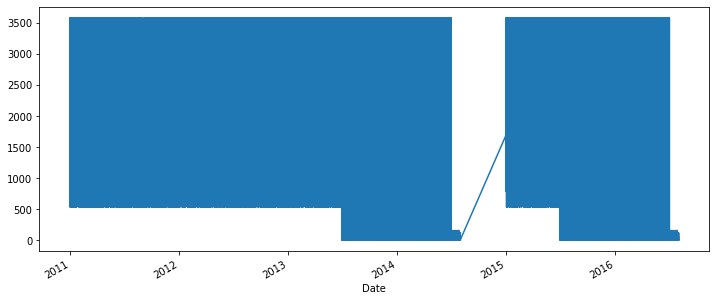

In [ ]:
df.Unit_Price.plot(figsize=(12, 5))
plt.show()

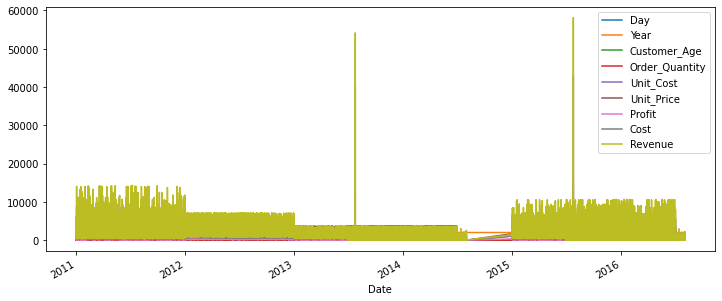

In [ ]:
df.plot(figsize=(12, 5))
plt.show()

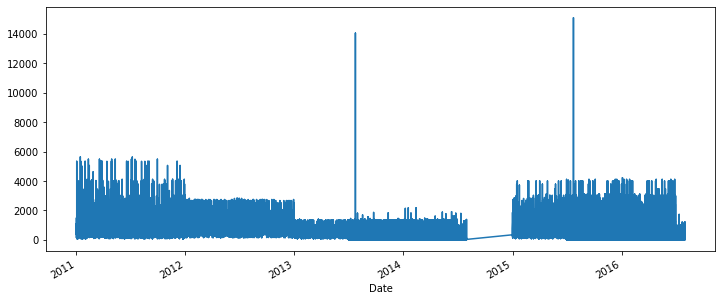

In [ ]:
df.Profit.plot(figsize=(12, 5))
plt.show()

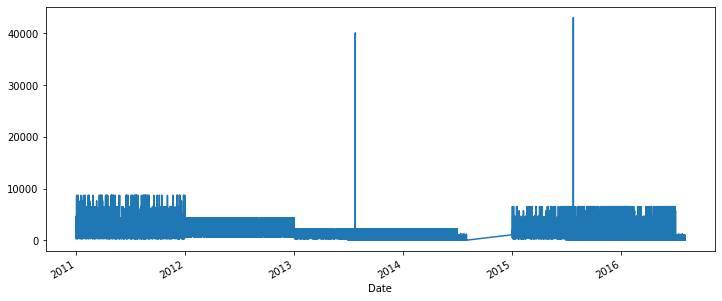

In [ ]:
df.Cost.plot(figsize=(12, 5))
plt.show()

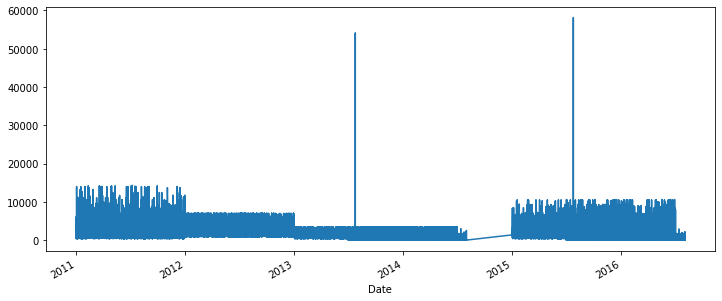

In [ ]:
df.Revenue.plot(figsize=(12, 5))
plt.show()

#### Analyse et visualisation des variables numériques

In [ ]:
df['Unit_Cost'].describe()

count    113036.000000
mean        267.296366
std         549.835483
min           1.000000
25%           2.000000
50%           9.000000
75%          42.000000
max        2171.000000
Name: Unit_Cost, dtype: float64

In [ ]:
df['Unit_Cost'].mean()

267.296365759581

In [ ]:
df['Unit_Cost'].median()

9.0

<AxesSubplot:>

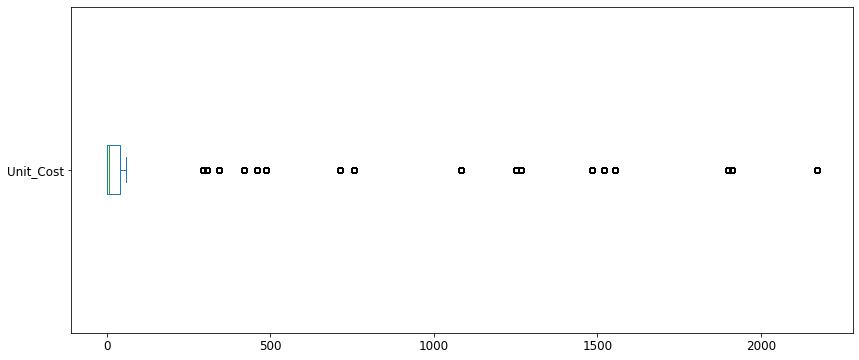

In [ ]:
df['Unit_Cost'].plot(kind="box",figsize=(14,6),vert=False, fontsize=12)

Text(0, 0.5, 'Sales')

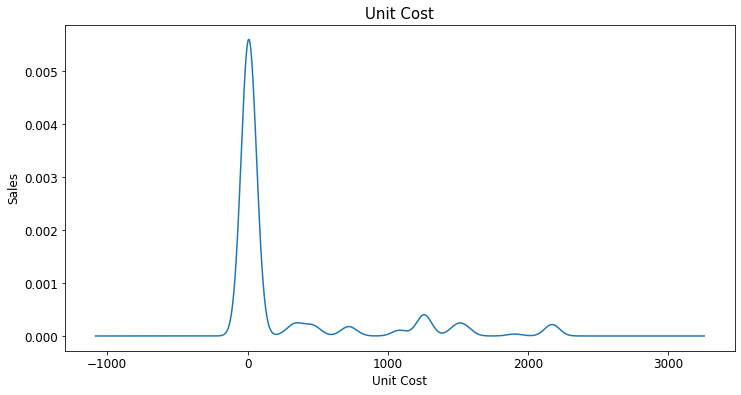

In [ ]:
df['Unit_Cost'].plot(kind="density", figsize=(12,6), fontsize=12)
plt.title("Unit Cost", fontsize=15)
plt.xlabel("Unit Cost", fontsize=15)
plt.xlabel("Unit Cost", fontsize=12)
plt.ylabel("Sales", fontsize=12)

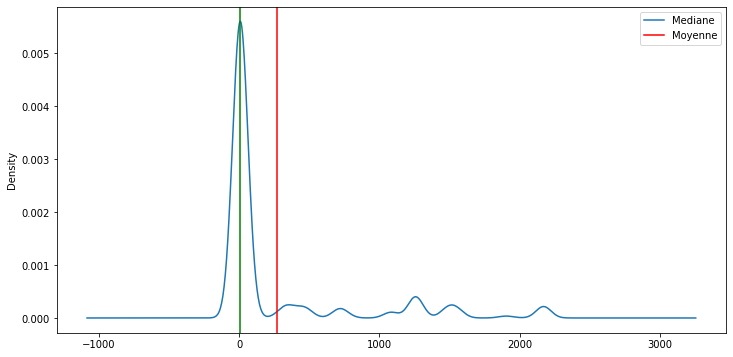

In [ ]:
ax=df['Unit_Cost'].plot(kind="density", figsize=(12,6))
# ax.axvlines(df['Unit_Cost'].mean())
mean = ax.axvline(df['Unit_Cost'].mean(), color='red')
median= ax.axvline(df['Unit_Cost'].median(), color='g')
plt.legend({'Mediane':median, 'Moyenne': mean})

In [ ]:
ax

Text(0.5, 0, 'Dollars')

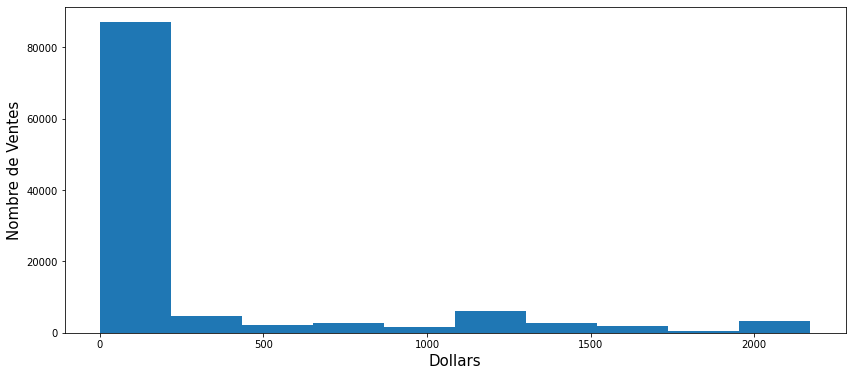

In [ ]:
ax= df['Unit_Cost'].plot(kind='hist', figsize=(14, 6))
ax.set_ylabel('Nombre de Ventes', fontsize=15)
ax.set_xlabel('Dollars', fontsize=15)

Moyenne des âges des clients

In [ ]:
df["Customer_Age"].value_counts().mean()

1614.8

<AxesSubplot:>

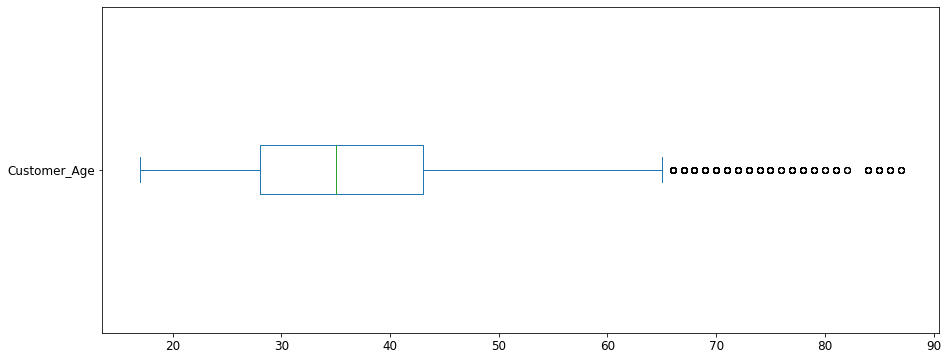

In [ ]:
df["Customer_Age"].plot(kind='box', vert=False, figsize=(15, 6), fontsize=12)

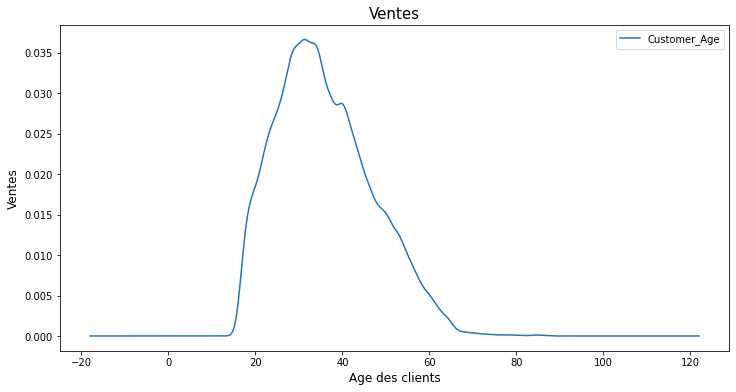

In [ ]:
df["Customer_Age"].plot(kind='kde', figsize=(12,6))
plt.title("Ventes", fontsize=15)
plt.xlabel("Age des clients", fontsize=12)
plt.ylabel("Ventes", fontsize=12)
plt.legend()

Ventes annuelles

In [ ]:
df['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:>

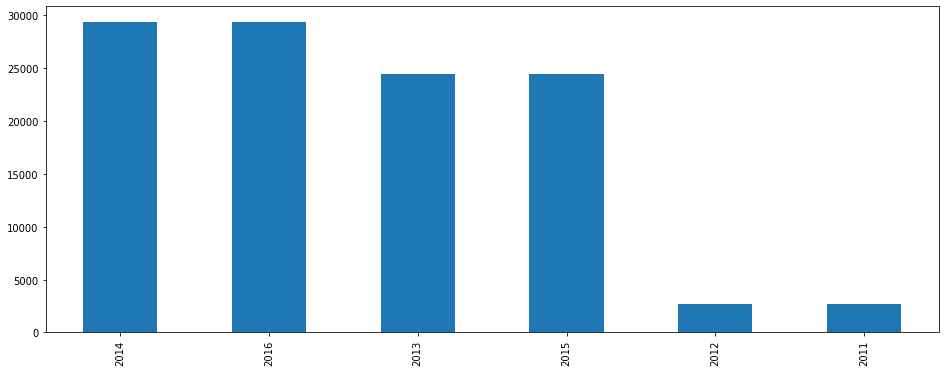

In [ ]:
df["Year"].value_counts().plot(kind="bar", figsize=(16,6))

Ventes mensuelles

In [ ]:
df['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

Evolution annuelle des vente

In [ ]:
df['Year'].value_counts()

2014    29398
2016    29398
2013    24443
2015    24443
2012     2677
2011     2677
Name: Year, dtype: int64

<AxesSubplot:>

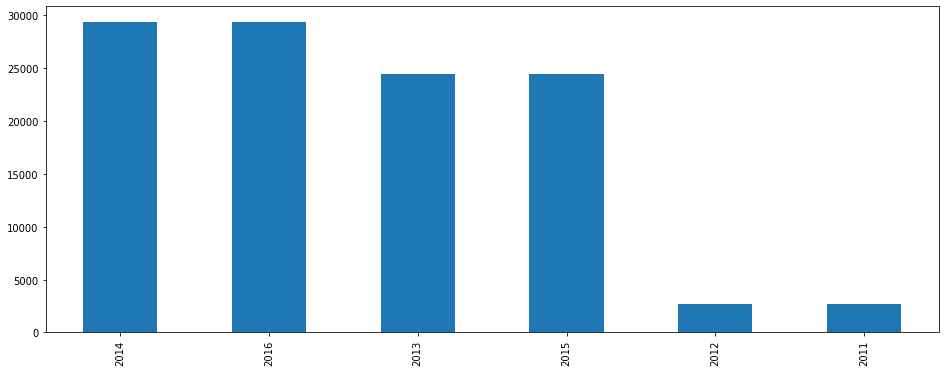

In [ ]:
df["Year"].value_counts().plot(kind="bar", figsize=(16,6))

#### Ventes mensuelles

In [ ]:
df['Month'].value_counts()

June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: Month, dtype: int64

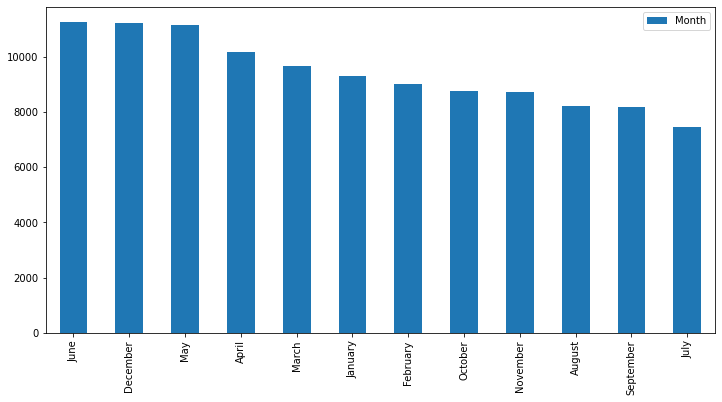

In [ ]:
df["Month"].value_counts().plot(kind="bar", figsize=(12,6))
plt.legend()

### Visualisation et analyse catégoricielles

#### Ventes par tranche d'âge

In [ ]:
df['Age_Group'].value_counts()

Adults (35-64)          55824
Young Adults (25-34)    38654
Youth (<25)             17828
Seniors (64+)             730
Name: Age_Group, dtype: int64

Text(0.5, 0, 'Age')

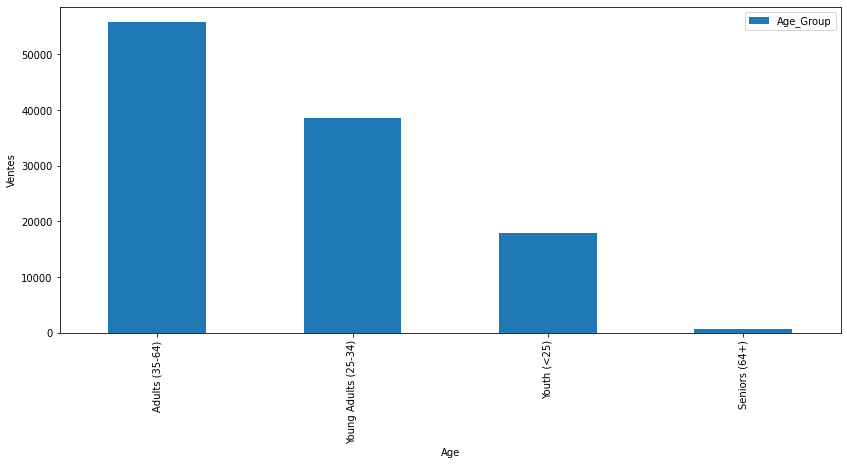

In [ ]:
df["Age_Group"].value_counts().plot(kind='bar', figsize=(14, 6))
plt.legend()
plt.legend()
plt.ylabel("Ventes")
plt.xlabel("Age")

Text(0.5, 1.0, 'Age Group')

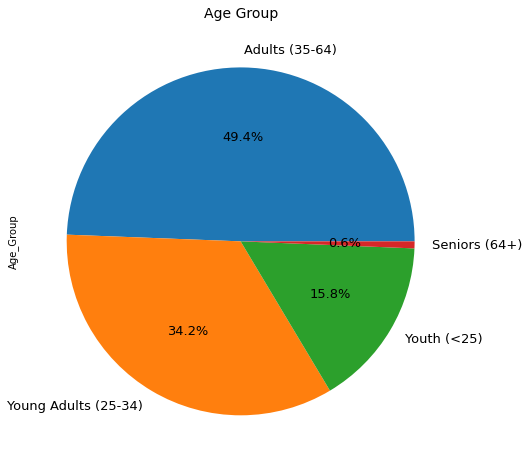

In [ ]:
df["Age_Group"].value_counts().plot(kind='pie', autopct='%1.1f%%',figsize=(14,8),fontsize=13)
plt.title("Age Group", fontsize=14)

#### Moyenne des ordre de vente

In [ ]:
df["Order_Quantity"].mean()

11.901659648253654

Text(0.5, 1.0, 'Quantité Commandée')

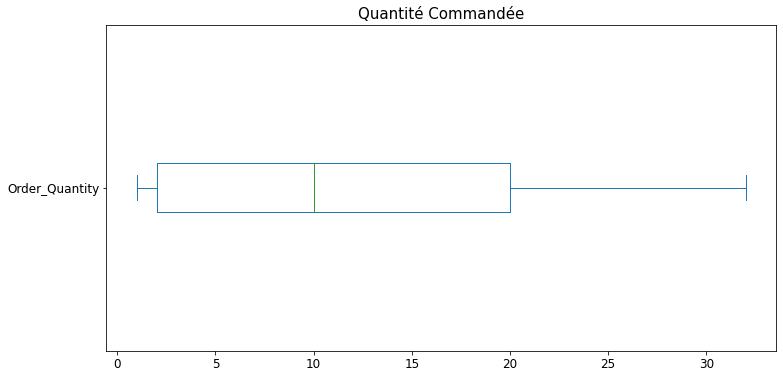

In [ ]:
df["Order_Quantity"].plot(kind='box', vert=False, figsize=(12,6), fontsize=12)
plt.title("Quantité Commandée", fontsize=15)

#### Ventes par pays

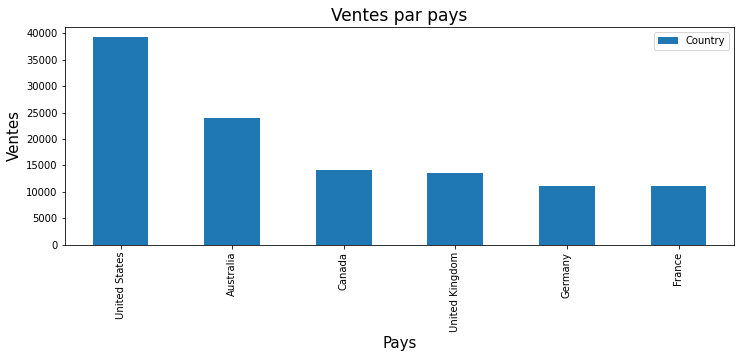

In [ ]:
df['Country'].value_counts().plot(kind='bar', figsize=(12, 4))
plt.title("Ventes par pays", fontsize=17)
plt.ylabel("Ventes", fontsize=15)
plt.xlabel("Pays", fontsize=15)
plt.legend()

In [ ]:
#### List des produits vendus

In [ ]:
MostSales=df.loc[: ,"Product"].unique()
# sales['Product'].unique()

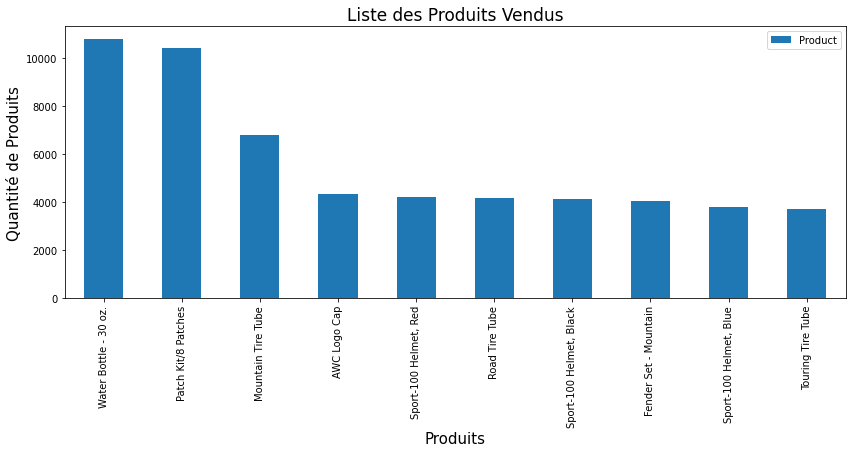

In [ ]:
df.loc[: ,"Product"].value_counts().head(10).plot(kind='bar', figsize=(14,5))
plt.title("Liste des Produits Vendus", fontsize=17)
plt.ylabel("Quantité de Produits", fontsize=15)
plt.xlabel("Produits", fontsize=15)
plt.legend()

#### Relation entre Coût et Prix unitaires

Text(0.5, 0, 'Coût Unitaire')

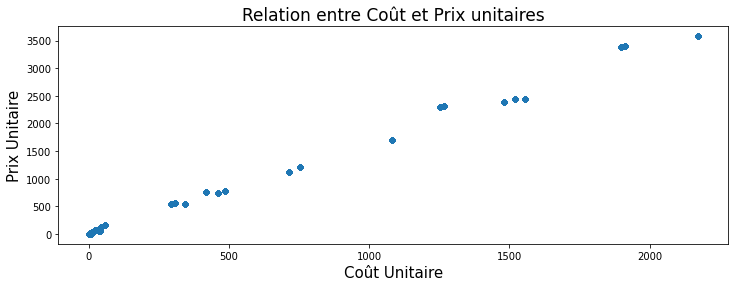

In [ ]:
df.plot(kind='scatter', x="Unit_Cost", y="Unit_Price", figsize=(12,4), fontsize=10)
plt.title("Relation entre Coût et Prix unitaires", fontsize=17)
plt.ylabel("Prix Unitaire", fontsize=15)
plt.xlabel("Coût Unitaire", fontsize=15)

#### Relation entre Quantité commandée et Profit

Text(0.5, 1.0, 'Relation entre Quantité Commandée et Profit')

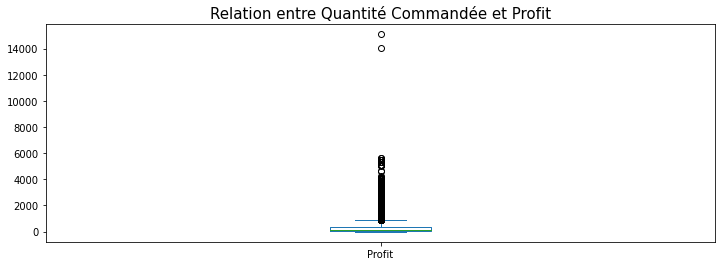

In [ ]:
df.plot(kind="box",x='Order_Quantity', y='Profit', figsize=(12, 4), fontsize=10)
plt.title("Relation entre Quantité Commandée et Profit", fontsize=15)

#### Relation entre Pays et Profit Unitaire

Text(0.5, 1.0, 'Relation entre Pays & Profit Unitaire')

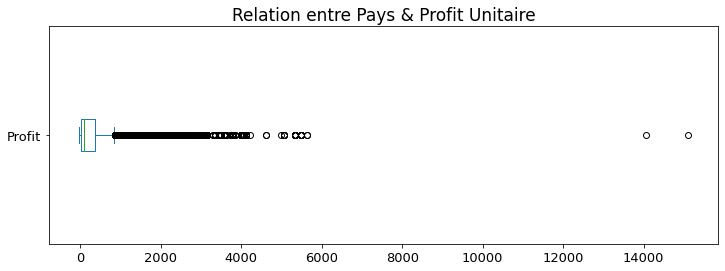

In [ ]:
df.plot(kind="box", x='Country', y='Profit', figsize=(12,4), fontsize=13, vert=False)
plt.title("Relation entre Pays & Profit Unitaire", fontsize=17)

In [ ]:
#### Tranche d'âge par pays

<AxesSubplot:title={'center':'Customer_Age'}, xlabel='[Country]'>

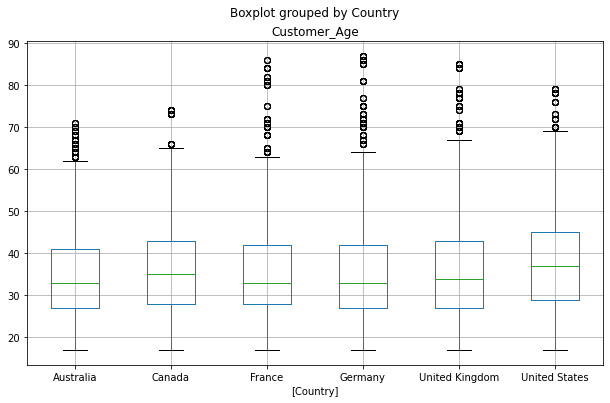

In [ ]:
df[["Customer_Age", "Country"]].boxplot(by='Country', figsize=(10,6))

*Combien de commandes ont été passées en France ?*

In [ ]:
df.loc[((df['Country']=='France'))].shape[0]

10998

Combien de Vélos de route ont été commandés en France ?

In [ ]:
df.loc[(df['Country']=='France') & (df['Sub_Category']=='Road Bikes')].shape[0]

1438

Ventes dans chaque région française

In [ ]:
df.loc[df["Country"]=="France", "State"].value_counts()

Seine (Paris)        2328
Seine Saint Denis    1684
Nord                 1670
Hauts de Seine       1084
Essonne               994
Yveline               954
Seine et Marne        394
Moselle               386
Loiret                382
Val d'Oise            264
Garonne (Haute)       208
Val de Marne          158
Charente-Maritime     148
Somme                 134
Loir et Cher          120
Pas de Calais          90
Name: State, dtype: int64

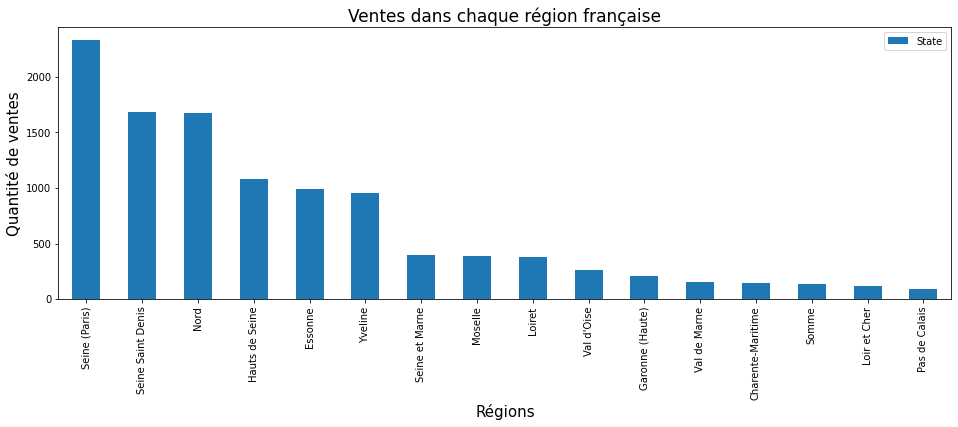

In [ ]:
df.loc[df["Country"]=="France", "State"].value_counts().plot(kind='bar', figsize=(16,5))
plt.title("Ventes dans chaque région française", fontsize=17)
plt.ylabel("Quantité de ventes", fontsize=15)
plt.xlabel("Régions", fontsize=15)
plt.legend()

plt.legend()

Combien de ventes ont été effectuées par catégories ?

In [ ]:
df['Sub_Category'].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

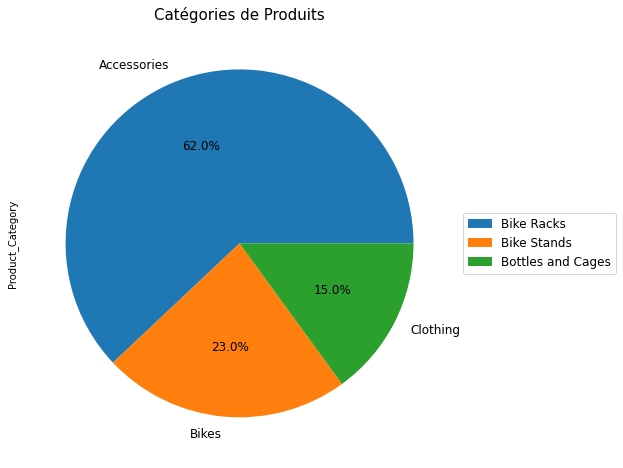

In [ ]:
df['Product_Category'].value_counts().plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', fontsize=12)
Cat=df['Sub_Category'].unique()
plt.title("Catégories de Produits", fontsize=15)
plt.legend(Cat, fontsize=12, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

In [ ]:
df["Sub_Category"].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Road Bikes           13430
Helmets              12158
Mountain Bikes        8854
Jerseys               6010
Caps                  4358
Fenders               4032
Touring Bikes         3698
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

In [ ]:
df.loc[df['Product_Category']=='Accessories', "Sub_Category"].value_counts()

Tires and Tubes      33870
Bottles and Cages    15876
Helmets              12158
Fenders               4032
Cleaners              1802
Hydration Packs       1334
Bike Racks             592
Bike Stands            456
Name: Sub_Category, dtype: int64

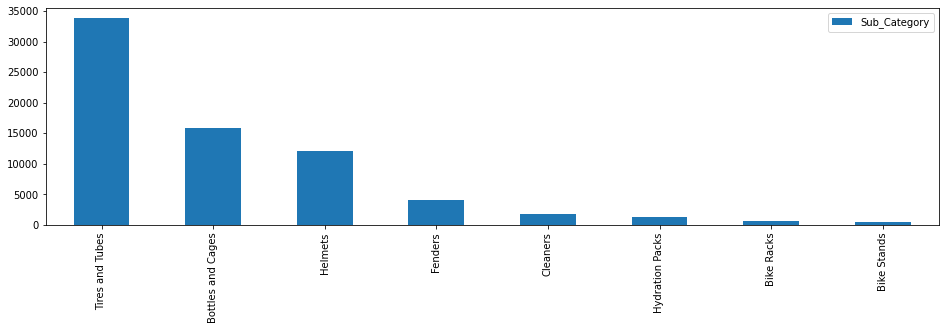

In [ ]:
df.loc[df['Product_Category']=='Accessories', "Sub_Category"].value_counts().plot(kind="bar", figsize=(16, 4))
plt.legend()

In [ ]:
df.loc[df['Product_Category']=="Bikes", "Sub_Category"].value_counts()

Road Bikes        13430
Mountain Bikes     8854
Touring Bikes      3698
Name: Sub_Category, dtype: int64

Text(0.5, 1.0, 'Catégories de Vélos')

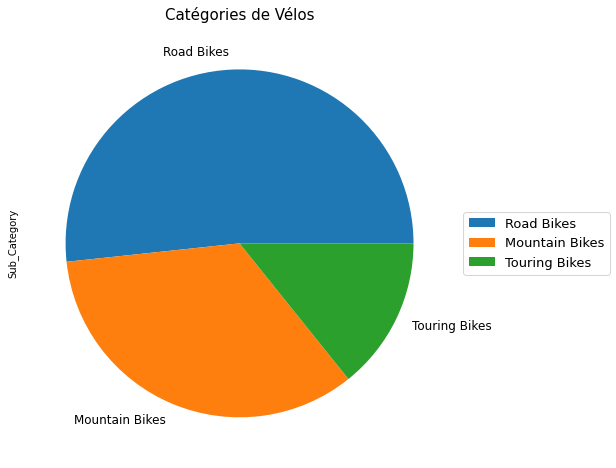

In [ ]:
Pc=df.loc[df['Product_Category']=="Bikes", "Sub_Category"].unique()
df.loc[
    df['Product_Category']=="Bikes", "Sub_Category"].value_counts().plot(kind="pie", figsize=(8,8), fontsize=12)
plt.legend(fontsize=13, loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("Catégories de Vélos", fontsize=15)

Quel genre génère le plus de vente ?

In [ ]:
df['Customer_Gender'].value_counts()

M    58312
F    54724
Name: Customer_Gender, dtype: int64

Text(0, 0.5, 'Ventes')

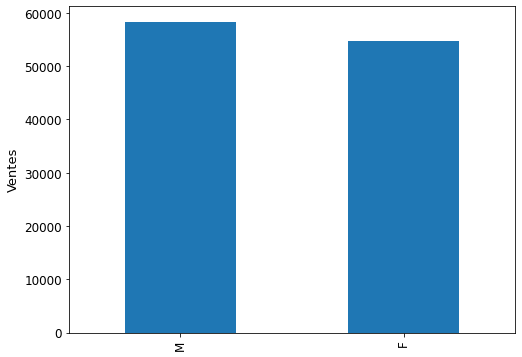

In [ ]:
df['Customer_Gender'].value_counts().plot(kind='bar', fontsize=12, figsize=(8,6))
plt.ylabel("Ventes", fontsize=13)

Combien de ventes à plus de 500 USD ont été générés par des hommes ?

In [ ]:
df.loc[(df['Customer_Gender']=="M") & (df["Revenue"]>=500)].shape[0]

21781

Quelles sont les 5 ventes ayant généré le plus de chiffre d'affaire ?

In [ ]:
df.sort_values(['Revenue'], ascending=False).head(5)

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
Date,,,,,,,,,,,,,,,,,,
2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-July-24
2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-July-24
2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-July-8
2011-04-30,30,April,2011,44,Adults (35-64),M,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-April-30
2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-September-30


Quelle est la moyenne des quantités de commandes ayant générées plus de 10K de CA ?

In [ ]:
df.loc[df["Revenue"]>10000, "Order_Quantity"].mean()

# cond = df['Revenue'] > 10_000
# df.loc[cond, 'Order_Quantity'].mean()

3.7218934911242605

Quelle est la moyenne des quantités commandées ayant générées moins de 10K de CA ?

In [ ]:
df.loc[df["Revenue"]<10000, "Order_Quantity"].mean()

11.913907519469818

Combien de commandes ont été effectuées en mai 2016 ?

In [ ]:
df.loc[(df["Year"]==2016) & (df["Month"]=='May')].shape[0]

5015

How many de commandes ont été effectuées entre mai et juillet 2016 ?

In [ ]:
df.loc[(df['Year'] == 2016) & (df['Month'].isin(['May', 'June', 'July']))].shape[0]

12164

<AxesSubplot:title={'center':'Profit'}, xlabel='[Month]'>

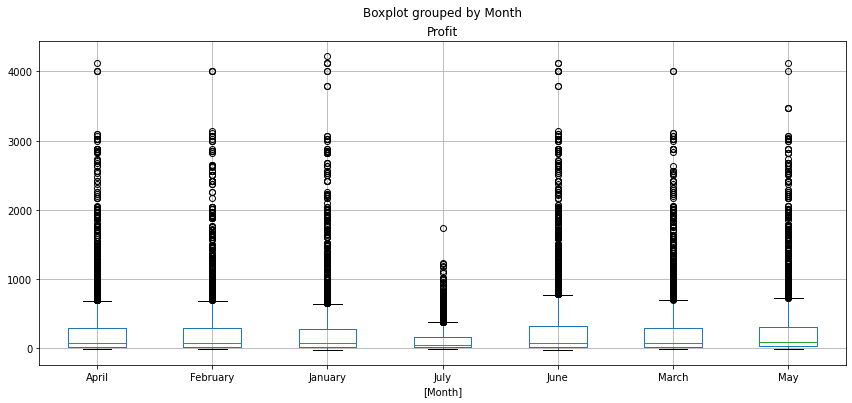

In [ ]:
Sales2016= df.loc[df["Year"]==2016, ['Profit', 'Month']]
Sales2016.boxplot(by="Month", figsize=(14,6))

CA en fonction de l'âge

<Figure size 1152x576 with 0 Axes>

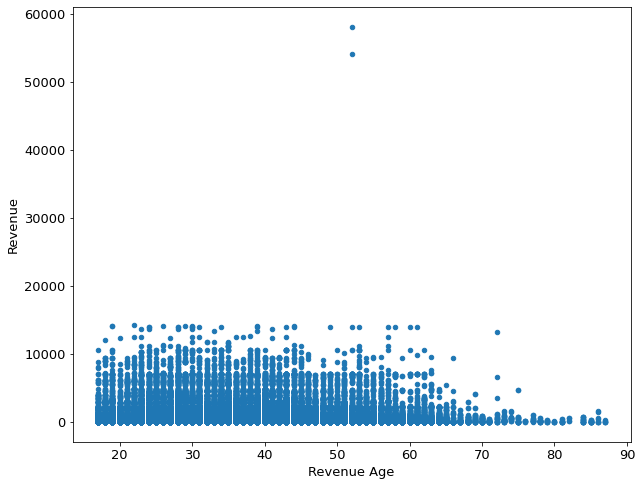

In [ ]:
plt.figure(figsize=(16,8))
df.plot(kind="scatter", x="Customer_Age", y="Revenue", figsize=(10, 8), fontsize=13)
plt.xlabel("Revenue Age", fontsize=13)
plt.ylabel("Revenue", fontsize=13)
plt.show()

CA par rapport au bénéfice

Text(0, 0.5, 'Profit')

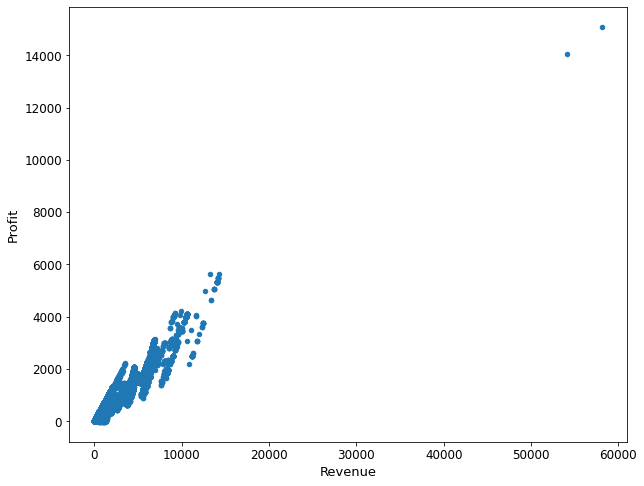

In [ ]:
df.plot(kind='scatter', x='Revenue', y='Profit', figsize=(10,8), fontsize=12)
plt.xlabel("Revenue", fontsize=13)
plt.ylabel("Profit", fontsize=13)

Quelles sont les ventes effectuées dans les Hauts de Seine ?

In [ ]:
df.loc[df["State"]=='Hauts de Seine']#.head()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
Date,,,,,,,,,,,,,,,,,,
2014-06-10,10,June,2014,29,Young Adults (25-34),F,France,Hauts de Seine,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,133,90,223,2014-June-10
2016-06-10,10,June,2016,29,Young Adults (25-34),F,France,Hauts de Seine,Accessories,Bike Racks,Hitch Rack - 4-Bike,2,45,120,133,90,223,2016-June-10
2014-05-04,4,May,2014,45,Adults (35-64),F,France,Hauts de Seine,Accessories,Bike Racks,Hitch Rack - 4-Bike,10,45,120,666,450,1116,2014-May-4
2016-05-04,4,May,2016,45,Adults (35-64),F,France,Hauts de Seine,Accessories,Bike Racks,Hitch Rack - 4-Bike,7,45,120,466,315,781,2016-May-4
2013-12-31,31,December,2013,24,Youth (<25),M,France,Hauts de Seine,Accessories,Bike Stands,All-Purpose Bike Stand,10,59,159,889,590,1479,2013-December-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-07,7,December,2015,29,Young Adults (25-34),M,France,Hauts de Seine,Clothing,Vests,"Classic Vest, S",20,24,64,710,480,1190,2015-December-7
2014-06-03,3,June,2014,30,Young Adults (25-34),F,France,Hauts de Seine,Clothing,Vests,"Classic Vest, S",11,24,64,391,264,655,2014-June-3
2016-06-03,3,June,2016,30,Young Adults (25-34),F,France,Hauts de Seine,Clothing,Vests,"Classic Vest, S",11,24,64,391,264,655,2016-June-3


Quelle est la moyenne des ventes des Adultes dans la tranche (35-64) ?

In [ ]:
df.loc[df['Age_Group'] == 'Adults (35-64)', 'Revenue'].mean()

762.8287654055604

In [ ]:
df.loc[(df['Age_Group'] == 'Youth (<25)') | (df['Age_Group'] == 'Adults (35-64)')].shape[0]

73652

In [ ]:
df.loc[(df['Age_Group'] == 'Adults (35-64)') & (df['Country'] == 'United States'), 'Revenue'].mean()

726.7260473588342

In [ ]:
#### Relation entre les colonnes

In [ ]:
Corr=df.corr()
Corr

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
Day,1.000000,-0.007635,-0.014296,-0.002412,0.003133,0.003207,0.004623,0.003329,0.003853
Year,-0.007635,1.000000,0.040994,0.123169,-0.217575,-0.213673,-0.181525,-0.215604,-0.208673
Customer_Age,-0.014296,0.040994,1.000000,0.026887,-0.021374,-0.020262,0.004319,-0.016013,-0.009326
Order_Quantity,-0.002412,0.123169,0.026887,1.000000,-0.515835,-0.515925,-0.238863,-0.340382,-0.312895
Unit_Cost,0.003133,-0.217575,-0.021374,-0.515835,1.000000,0.997894,0.741020,0.829869,0.817865
Unit_Price,0.003207,-0.213673,-0.020262,-0.515925,0.997894,1.000000,0.749870,0.826301,0.818522
Profit,0.004623,-0.181525,0.004319,-0.238863,0.741020,0.749870,1.000000,0.902233,0.956572
Cost,0.003329,-0.215604,-0.016013,-0.340382,0.829869,0.826301,0.902233,1.000000,0.988758
Revenue,0.003853,-0.208673,-0.009326,-0.312895,0.817865,0.818522,0.956572,0.988758,1.000000


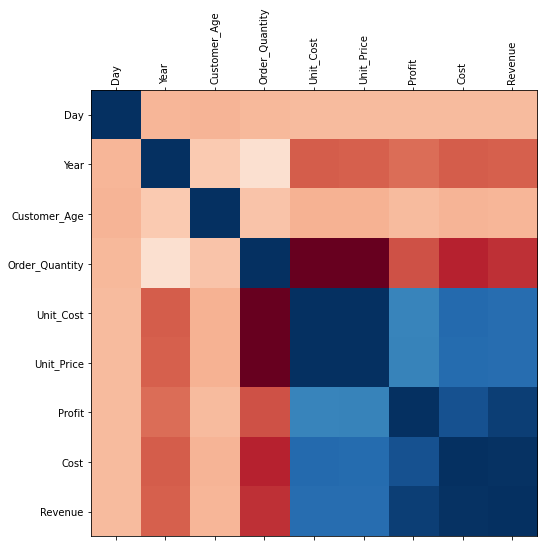

In [ ]:
figure = plt.figure(figsize=(8,8))
plt.matshow(Corr, cmap="RdBu", fignum=figure.number)
plt.xticks(range(len(Corr.columns)), Corr.columns, rotation='vertical')
plt.yticks(range(len(Corr.columns)), Corr.columns);

In [ ]:
bikes_d = df.loc[df['Product_Category'] == 'Bikes'].sort_index(axis = 0, ascending = True)
#data
# data.sort_index(axis = 0, ascending = True)
bikes_d

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
Date,,,,,,,,,,,,,,,,,,
2011-01-01,1,January,2011,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,1097,4342,5439,2011-January-1
2011-01-01,1,January,2011,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",1,344,540,185,344,529,2011-January-1
2011-01-01,1,January,2011,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",3,713,1120,482,2139,2621,2011-January-1
2011-01-01,1,January,2011,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",1,1519,2443,900,1519,2419,2011-January-1
2011-01-01,1,January,2011,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",1,1252,2295,561,1252,1813,2011-January-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-30,30,June,2016,29,Young Adults (25-34),M,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-200 Silver, 38",1,1266,2320,961,1266,2227,2016-June-30
2016-06-30,30,June,2016,53,Adults (35-64),F,United Kingdom,England,Bikes,Mountain Bikes,"Mountain-400-W Silver, 46",1,420,769,318,420,738,2016-June-30
2016-06-30,30,June,2016,44,Adults (35-64),F,Germany,Bayern,Bikes,Touring Bikes,"Touring-1000 Yellow, 50",1,1482,2384,878,1482,2360,2016-June-30


<AxesSubplot:>

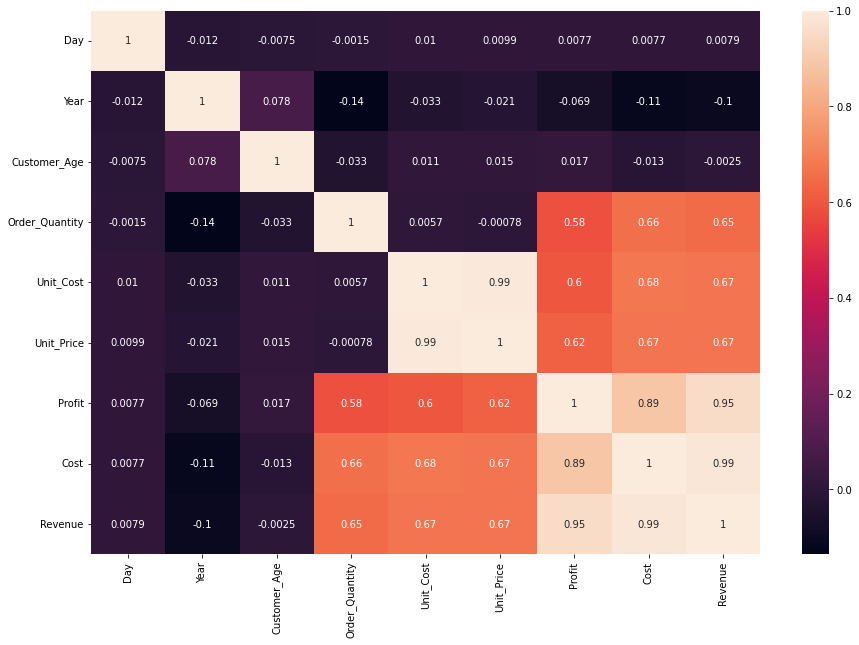

In [ ]:
corr=bikes_d.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr,annot=True)

/home/fitec/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/fitec/.local/lib/python3.8/site-packages/seaborn/_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

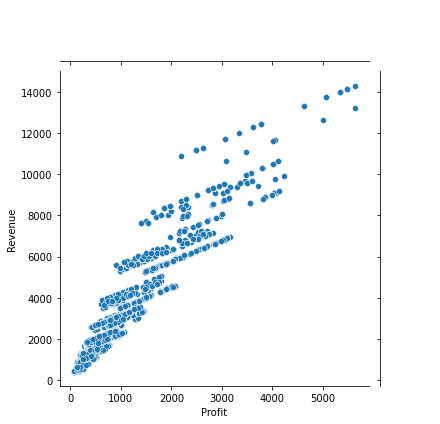

In [ ]:
sns.jointplot('Profit','Revenue',data=bikes_d)

In [ ]:
year_bd = bikes_d.groupby('year',as_index=False).sum()

In [ ]:
px.line(year_bd,x='year',y='Profit',labels={'x':'Années','y':'CA'},title='CA annuel')

NameError: name 'px' is not defined

In [ ]:
print(bikes_d.loc['2011-12-25'])

            Day     Month  Year  Customer_Age             Age_Group  \
Date                                                                  
2011-12-25   25  December  2011            34  Young Adults (25-34)   
2011-12-25   25  December  2011            38        Adults (35-64)   
2011-12-25   25  December  2011            31  Young Adults (25-34)   
2011-12-25   25  December  2011            27  Young Adults (25-34)   
2011-12-25   25  December  2011            25  Young Adults (25-34)   
2011-12-25   25  December  2011            50        Adults (35-64)   
2011-12-25   25  December  2011            44        Adults (35-64)   
2011-12-25   25  December  2011            37        Adults (35-64)   

           Customer_Gender         Country                State  \
Date                                                              
2011-12-25               F       Australia           Queensland   
2011-12-25               F       Australia             Victoria   
2011-12-25           

In [ ]:
bikes_d.groupby(by=["State"]).sum()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
State,,,,,,,,,
Alberta,254,28185,460,21,17024,27850,17886,28218,46104
Arizona,46,4028,64,4,2532,4640,4216,5064,9280
Bayern,6332,821756,13736,569,446514,752372,418976,631735,1050711
Brandenburg,900,128904,2212,81,61886,103056,49596,75981,125577
British Columbia,23916,3088849,56600,2224,1765036,2958552,1673076,2555823,4228899
California,76544,9803285,182068,6771,5419512,9164162,4930829,7550516,12481345
Charente-Maritime,654,80566,1170,55,33936,58214,31414,47381,78795
England,55058,7097463,122382,4833,3576250,6004866,2974139,4882855,7856994
Essonne,4390,539740,9478,361,348198,581328,285988,475548,761536


In [ ]:
bikes_d.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000,25982.000000
mean,15.678008,2013.839235,35.348241,1.401393,1131.561466,1901.138019,789.749673,1588.132476,2377.882149
std,8.744794,1.569079,9.959807,0.710429,587.174564,986.704937,664.465205,1234.047870,1849.199342
min,1.000000,2011.000000,17.000000,1.000000,295.000000,540.000000,66.000000,295.000000,410.000000
25%,8.000000,2013.000000,28.000000,1.000000,487.000000,783.000000,318.000000,713.000000,1042.000000
50%,16.000000,2014.000000,34.000000,1.000000,1252.000000,2295.000000,630.000000,1266.000000,2018.000000
75%,23.000000,2015.000000,42.000000,2.000000,1482.000000,2384.000000,997.000000,2171.000000,2934.000000
max,31.000000,2016.000000,75.000000,4.000000,2171.000000,3578.000000,5638.000000,8684.000000,14312.000000


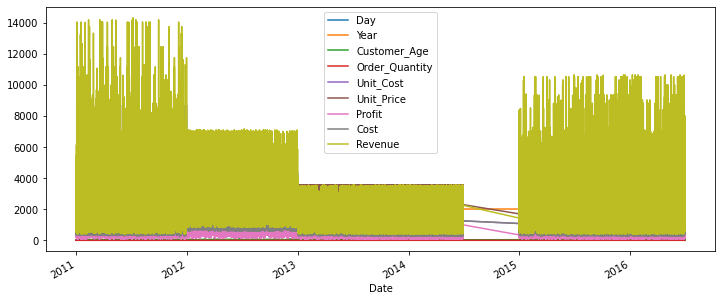

In [ ]:
bikes_d.plot(figsize=(12, 5))
plt.show()

<AxesSubplot:xlabel='Date'>

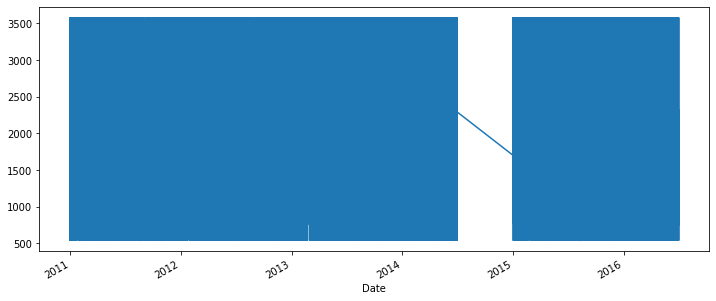

In [ ]:
bikes_d.Unit_Price.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

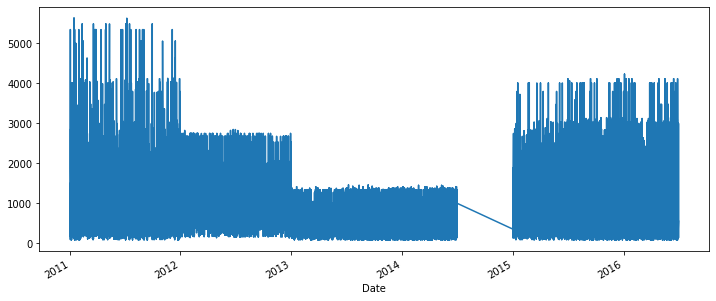

In [ ]:
bikes_d.Profit.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

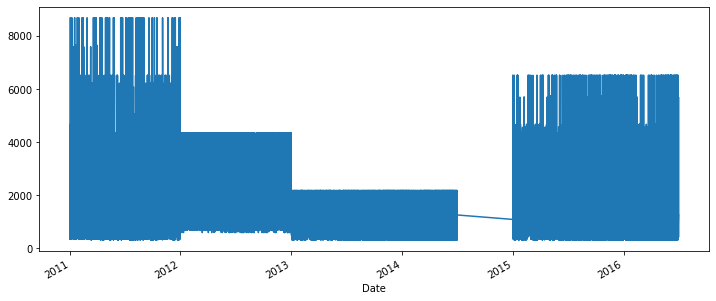

In [ ]:
bikes_d.Cost.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

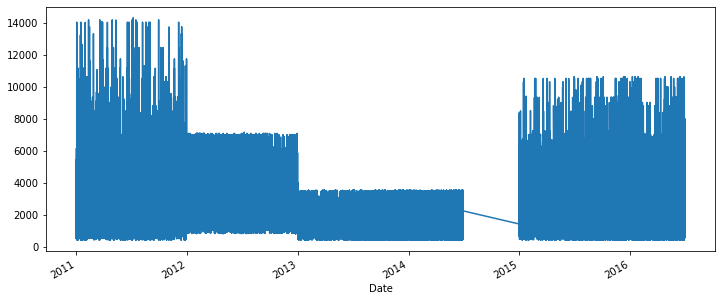

In [ ]:
bikes_d.Revenue.plot(figsize=(12, 5))

<AxesSubplot:xlabel='Date'>

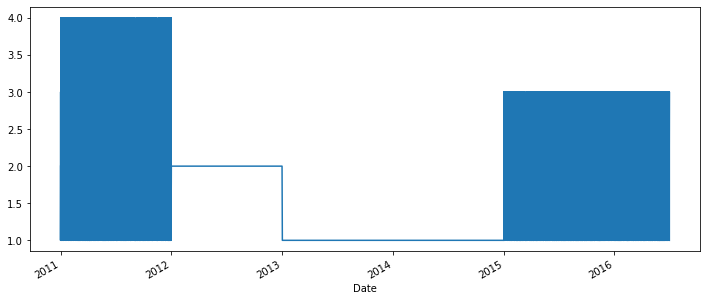

In [ ]:
bikes_d.Order_Quantity.plot(figsize=(12, 5))

In [ ]:
France_bd = bikes_d.loc[bikes_d['Country'] == 'France']
#data
# data.sort_index(axis = 0, ascending = True)
print(France_bd.sort_index(axis = 0, ascending = True).head(10))

            Day    Month  Year  Customer_Age             Age_Group  \
Date                                                                 
2011-01-01    1  January  2011            33  Young Adults (25-34)   
2011-01-04    4  January  2011            33  Young Adults (25-34)   
2011-01-10   10  January  2011            33  Young Adults (25-34)   
2011-01-12   12  January  2011            33  Young Adults (25-34)   
2011-01-12   12  January  2011            30  Young Adults (25-34)   
2011-01-15   15  January  2011            35        Adults (35-64)   
2011-01-17   17  January  2011            32  Young Adults (25-34)   
2011-01-22   22  January  2011            35        Adults (35-64)   
2011-01-22   22  January  2011            31  Young Adults (25-34)   
2011-01-23   23  January  2011            30  Young Adults (25-34)   

           Customer_Gender Country              State Product_Category  \
Date                                                                     
2011-01-01 

AxesSubplot(0.125,0.2;0.775x0.68)


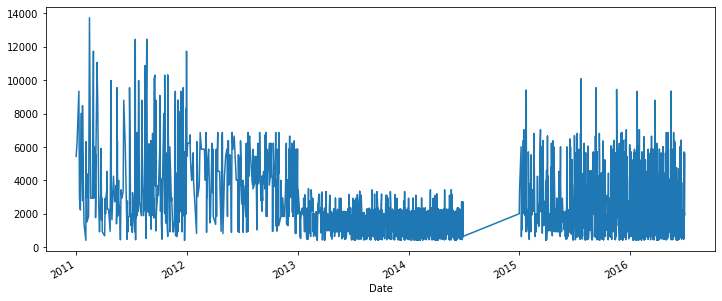

In [ ]:
print(France_bd.Revenue.plot(figsize=(12, 5)))

In [ ]:
Essonne_bd = bikes_d.loc[bikes_d['State'] == 'Essonne']
print(Essonne_bd.sort_index(axis = 0, ascending = True).head(10))

            Day     Month  Year  Customer_Age             Age_Group  \
Date                                                                  
2011-01-15   15   January  2011            35        Adults (35-64)   
2011-02-05    5  February  2011            27  Young Adults (25-34)   
2011-02-14   14  February  2011            41        Adults (35-64)   
2011-03-04    4     March  2011            37        Adults (35-64)   
2011-03-26   26     March  2011            24           Youth (<25)   
2011-04-12   12     April  2011            27  Young Adults (25-34)   
2011-04-27   27     April  2011            24           Youth (<25)   
2011-05-29   29       May  2011            32  Young Adults (25-34)   
2011-06-19   19      June  2011            40        Adults (35-64)   
2011-07-06    6      July  2011            24           Youth (<25)   

           Customer_Gender Country    State Product_Category    Sub_Category  \
Date                                                               

AxesSubplot(0.125,0.2;0.775x0.68)


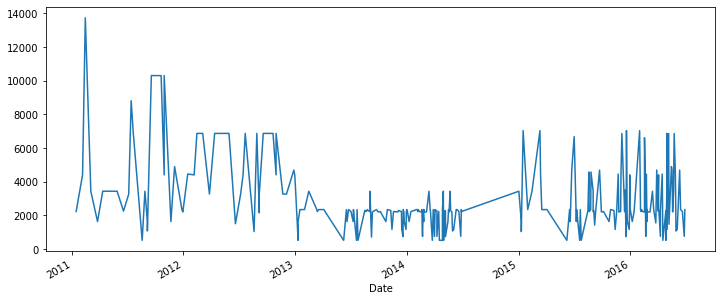

In [ ]:
print(Essonne_bd.Revenue.plot(figsize=(12, 5)))

In [ ]:
Essonne_bd.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,16.380597,2013.955224,35.365672,1.347015,1299.246269,2169.134328,1067.119403,1774.432836,2841.552239
std,9.230948,1.547576,9.334838,0.643980,489.014180,808.056018,729.385777,1213.344296,1928.137987
min,1.000000,2011.000000,19.000000,1.000000,344.000000,540.000000,174.000000,344.000000,518.000000
25%,8.000000,2013.000000,28.000000,1.000000,1083.000000,1701.000000,790.000000,1252.000000,2203.000000
50%,17.500000,2014.000000,35.000000,1.000000,1266.000000,2320.000000,951.000000,1482.000000,2289.000000
75%,25.000000,2015.000000,40.000000,2.000000,1555.000000,2443.000000,1264.000000,2171.000000,3435.000000
max,31.000000,2016.000000,59.000000,4.000000,2171.000000,3578.000000,5056.000000,8684.000000,13740.000000


In [ ]:
Essonne_bd.Order_Quantity.describe()

count    268.000000
mean       1.347015
std        0.643980
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Order_Quantity, dtype: float64

In [ ]:
Essonne_bd.Revenue.describe()

count      268.000000
mean      2841.552239
std       1928.137987
min        518.000000
25%       2203.000000
50%       2289.000000
75%       3435.000000
max      13740.000000
Name: Revenue, dtype: float64

In [ ]:
# df.loc[df['Date'] == '2015-12-25']
# df.loc[df['Day'] == 25 AND df['Month'] == 12 AND df['Year'] == 2014]
# df.loc[df['Day'] == 25 && df['Month'] == 12 && df['Year'] == 2014]
#print(Essonne_bd.loc['2014-12-25'])
#Essonne_bd.loc['2014-01-01']
print(France_bd.loc['2014-01-01'])

Day                                    1
Month                            January
Year                                2014
Customer_Age                          30
Age_Group           Young Adults (25-34)
Customer_Gender                        M
Country                           France
State                      Seine (Paris)
Product_Category                   Bikes
Sub_Category                  Road Bikes
Product                 Road-150 Red, 56
Order_Quantity                         1
Unit_Cost                           2171
Unit_Price                          3578
Profit                               763
Cost                                2171
Revenue                             2934
Calculated_Date           2014-January-1
Name: 2014-01-01 00:00:00, dtype: object


In [ ]:
Essonne_bd.tail()

,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Date
Date,,,,,,,,,,,,,,,,,,
2016-06-14,14,June,2016,30,Young Adults (25-34),M,France,Essonne,Bikes,Road Bikes,"Road-250 Black, 58",1,1555,2443,790,1555,2345,2016-June-14
2016-06-20,20,June,2016,32,Young Adults (25-34),F,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,961,1266,2227,2016-June-20
2016-06-26,26,June,2016,28,Young Adults (25-34),M,France,Essonne,Bikes,Road Bikes,"Road-650 Black, 48",1,487,783,265,487,752,2016-June-26
2016-06-28,28,June,2016,43,Adults (35-64),M,France,Essonne,Bikes,Mountain Bikes,"Mountain-200 Silver, 46",1,1266,2320,961,1266,2227,2016-June-28
2016-06-28,28,June,2016,52,Adults (35-64),M,France,Essonne,Bikes,Road Bikes,"Road-250 Black, 48",1,1555,2443,790,1555,2345,2016-June-28


In [ ]:
"""
type(Essonne_bd)
Frame_Ebd = Essonne_bd.to_frame()
Frame_Ebd
print(Frame_Ebd.loc['2014-12-25'])
"""

"\ntype(Essonne_bd)\nFrame_Ebd = Essonne_bd.to_frame()\nFrame_Ebd\nprint(Frame_Ebd.loc['2014-12-25'])\n"

In [ ]:
"""Frame_Ebd = Essonne_bd
print(type(Frame_Ebd))
print(type(Essonne_bd))
"""

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


La cible du problème de prédiction est le chiffre d'affaires des ventes de vélos sur une période donnée.

In [ ]:
Revenue_FEBD=Frame_Ebd['Revenue']
print(Revenue_FEBD)
print(type(Revenue_FEBD))

Date
2011-01-15     2227
2011-02-05     4406
2011-02-14    13740
2011-03-04     3435
2011-03-26     1633
              ...  
2016-06-14     2345
2016-06-20     2227
2016-06-26      752
2016-06-28     2227
2016-06-28     2345
Name: Revenue, Length: 268, dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
#type(Essonne_bd)
Frame_Ebd = Revenue_FEBD.to_frame()
type(Frame_Ebd)
#print(Frame_Ebd.loc['2014-12-25'])

pandas.core.frame.DataFrame

In [ ]:
Frame_Ebd

,Revenue
Date,
2011-01-15,2227
2011-02-05,4406
2011-02-14,13740
2011-03-04,3435
2011-03-26,1633
...,...
2016-06-14,2345
2016-06-20,2227
2016-06-26,752


In [ ]:
#Yearly_Revenue_FEBD=Frame_Ebd['Revenue']+Frame_Ebd['Year']
#age_sex = titanic[["Age", "Sex"]]
Yearly_Revenue_FEBD=Frame_Ebd[['Revenue']]
Yearly_Revenue_FEBD

,Revenue
Date,
2011-01-15,2227
2011-02-05,4406
2011-02-14,13740
2011-03-04,3435
2011-03-26,1633
...,...
2016-06-14,2345
2016-06-20,2227
2016-06-26,752


AxesSubplot(0.125,0.2;0.775x0.68)


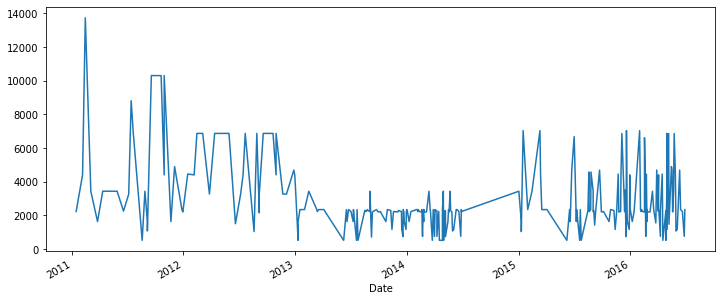

In [ ]:
print(Revenue_FEBD.plot(figsize=(12, 5)))

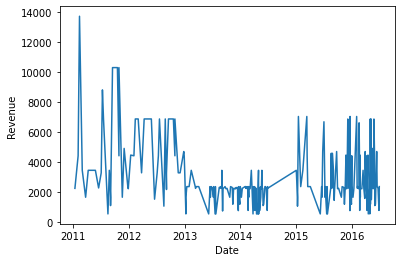

In [ ]:
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.plot(Revenue_FEBD)

Nous pouvons observer qu'il existe une saisonnalité associée aux données.

### Sous-catégories de vélos

In [ ]:
Frame_Ebd

,Revenue
Date,
2011-01-15,2227
2011-02-05,4406
2011-02-14,13740
2011-03-04,3435
2011-03-26,1633
...,...
2016-06-14,2345
2016-06-20,2227
2016-06-26,752


In [ ]:
tabl = pd.pivot_table(Essonne_bd, columns=['Sub_Category'], aggfunc=np.sum)
tabl

Sub_Category,Mountain Bikes,Road Bikes,Touring Bikes
Cost,125426,289990,60132
Customer_Age,2790,5276,1412
Day,1298,2614,478
Order_Quantity,103,208,50
Profit,95241,158007,32740
Revenue,220667,447997,92872
Unit_Cost,97364,205284,45550
Unit_Price,178446,329602,73280
Year,161129,302061,76550


### Test de Stationarité

Toutes les données de séries chronologiques doivent subir un test de stationnarité avant de procéder à un modèle.

In [ ]:
grouped_RFEBD=Revenue_FEBD.groupby(by=["Date"]).sum()

<AxesSubplot:xlabel='Date'>

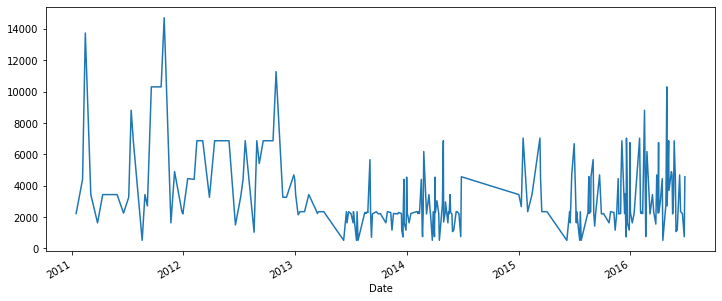

In [ ]:
grouped_RFEBD.plot(figsize=(12, 5))
#plt.show()

Habituellement, dans le modèle ARIMA de base, nous devons fournir les valeurs p, d et q qui sont essentielles.
Nous utilisons des techniques statistiques pour générer ces valeurs en effectuant la différence pour éliminer la non-stationnarité et en traçant les graphiques ACF et PACF.

In [ ]:
import warnings
import itertools
# defined a matplotlib style of fivethirtyeight for our plots
plt.style.use('fivethirtyeight')

Envisager dans les axes d'amélioration de regrouper les données par mois

In [ ]:
# ensure we have no missing values in our time series
filled_GRFEBD=grouped_RFEBD.fillna(grouped_RFEBD.bfill()) # bfill use the value before filling in missing values
print(filled_GRFEBD)

Date
2011-01-15     2227
2011-02-05     4406
2011-02-14    13740
2011-03-04     3435
2011-03-26     1633
              ...  
2016-06-11     4691
2016-06-14     2345
2016-06-20     2227
2016-06-26      752
2016-06-28     4572
Name: Revenue, Length: 236, dtype: int64


<AxesSubplot:xlabel='Date'>

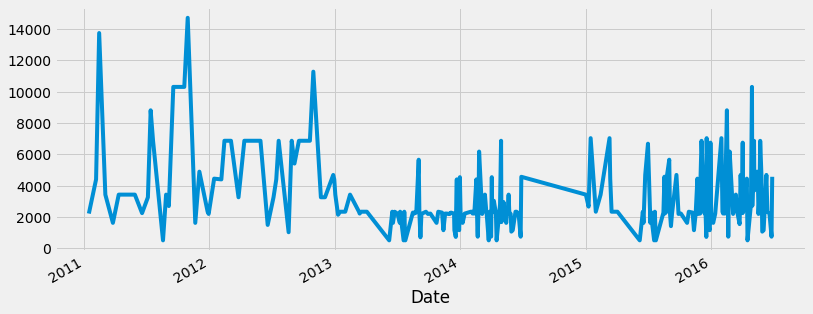

In [ ]:
filled_GRFEBD.plot(figsize=(12, 5))

Prétraitons un peu nos données avant d'aller de l'avant.
Les données hebdomadaires peuvent être difficiles à utiliser car elles sont plus brèves, donc nous utilisons plutôt des moyennes mensuelles et ferons la conversion avec la fonction resample.

In [ ]:
# Resampling the time series data based on months 'M'
monthly_FGRFEBD = filled_GRFEBD.resample('M').mean()
monthly_FGRFEBD

Date
2011-01-31    2227.000000
2011-02-28    9073.000000
2011-03-31    2534.000000
2011-04-30    3435.000000
2011-05-31    3435.000000
                 ...     
2016-02-29    3945.818182
2016-03-31    2742.666667
2016-04-30    4052.500000
2016-05-31    4086.500000
2016-06-30    2625.500000
Freq: M, Name: Revenue, Length: 66, dtype: float64

Test de Dickey-Fuller augmenté (ADF) : La série temporelle est considérée comme stationnaire si la valeur p est faible (selon l’hypothèse nulle) et si les valeurs critiques à des intervalles de confiance de 1%, 5%, 10% sont aussi proches que possible des statistiques de l’ADF (Augmented Dickey-Fuller)

Tout d'abord, nous allons vérifier si la série est stationnaire à l'aide du test Augmented Dickey Fuller (test ADF), du package statsmodels.
La raison en est que nous n'avons besoin de différencier que si la série n'est pas stationnaire.
Sinon, aucune différenciation n'est nécessaire, c'est-à-dire d = 0.

    L'hypothèse nulle (Ho) du test ADF est que la série chronologique est non stationnaire.
    Ainsi, si la valeur p du test est inférieure au seuil de signification (0,05), nous rejetons l'hypothèse nulle et déduisons que la série chronologique est effectivement stationnaire.

    Ainsi, dans notre cas, si P Value > 0,05, nous poursuivons la recherche de l'ordre de différenciation.

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
ADF_MFGRFEBD = adfuller(monthly_FGRFEBD.dropna())
print('ADF Statistic: %f' % ADF_MFGRFEBD[0])
print('p-value: %f' % ADF_MFGRFEBD[1])

ADF Statistic: -1.087753
p-value: 0.719931


Comme indiqué précédemment, le but de la différenciation est de rendre la série chronologique stationnaire.
Mais nous devons faire attention à ne pas trop différencier les séries.
Une série surdifférenciée peut encore être stationnaire, ce qui affectera à son tour les paramètres du modèle.

    Nous devons donc déterminer le bon ordre de différenciation.
    Le bon ordre de différenciation est la différenciation minimale requise pour obtenir une série quasi stationnaire qui erre autour d'une moyenne définie et le tracé ACF atteint zéro assez rapidement.

    Tant que les autocorrélations sont positives pour un grand nombre de retards (10 ou plus), la série doit être différenciée davantage.
    D'un autre côté, si l'autocorrélation du décalage 1 elle-même est trop négative, alors la série est probablement trop différenciée.

    Si nous ne pouvons pas vraiment décider entre deux ordres de différenciation, nous optons pour l'ordre qui donne le moins d'écart type dans la série différenciée.

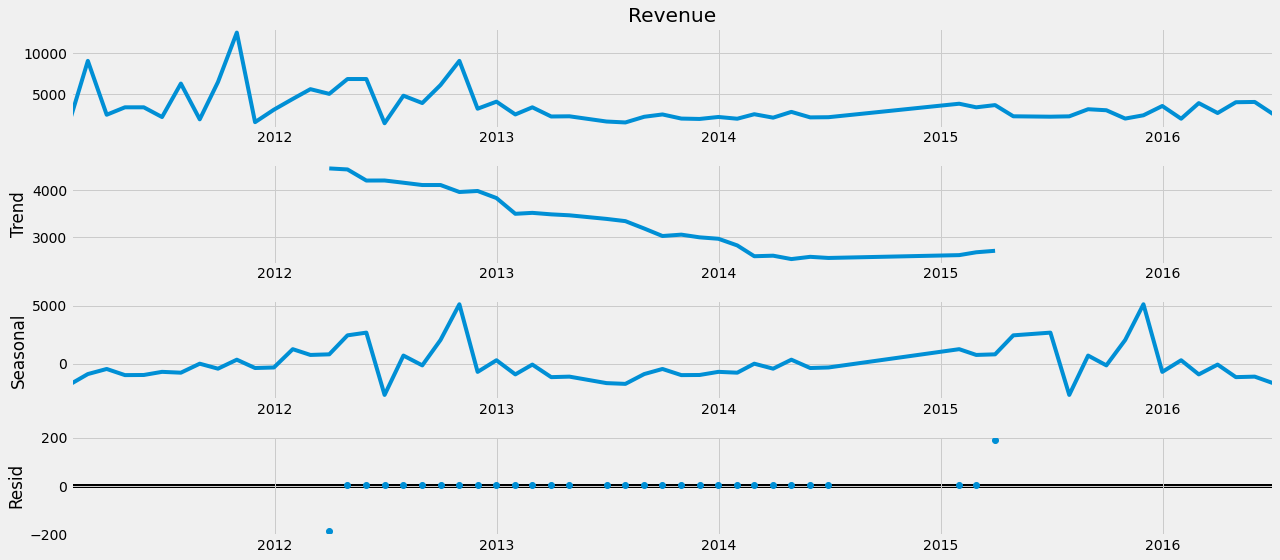

In [ ]:
dropped_MFGRFEB= monthly_FGRFEBD.dropna()
rcParams['figure.figsize']=18,8
decomposition=sm.tsa.seasonal_decompose(
    dropped_MFGRFEB, model= 'additive', period= 29)
fig= decomposition.plot()
plt.show()

## Prediction

### SARIMA

#### Selection de Parametre

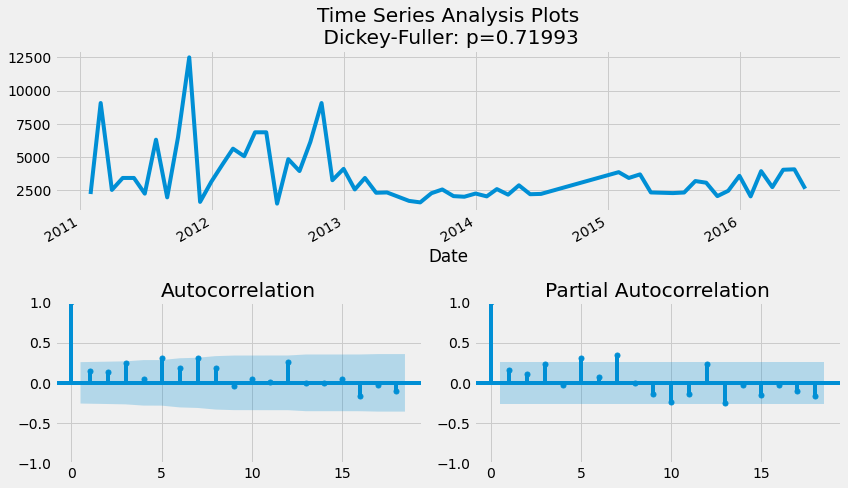

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def tsplot(y, lags=None, figsize=(12, 7)):
    """
    Plot time series, its ACF and PACF, calculate Dickey-Fuller test
    
    y - timeseries
    lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    fig = plt.figure(figsize=figsize)
    layout = (2,2)
    ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
    acf_ax = plt.subplot2grid(layout, (1, 0))
    pacf_ax = plt.subplot2grid(layout, (1, 1))
    
    y.plot(ax=ts_ax)
    p_value = sm.tsa.stattools.adfuller(dropped_MFGRFEB)[1]
    ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
    #smt.graphics.plot_pacf(y, lags=lags, ax=acf_ax)
    #smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
    #smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
    smt.plot_acf(y, lags=lags, ax=acf_ax)
    #smt.plotpacf(y, lags=lags, ax=pacf_ax)
    smt.plot_pacf(y, lags=lags, ax=pacf_ax)
    #sm.graphics.plot_pacf(y, lags=lags, ax=acf_ax)
    #sm.graphics.plot_pacf(y, lags=lags, ax=acf_ax)
    plt.tight_layout()
    #plt.close()
    
tsplot(dropped_MFGRFEB)

#### order of differencing (d)

In [ ]:
# Define the p, d and q parameters to take any value between 0 and 9
p = d = q = range(0,2)

# Generate all different combinations of p, q and triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of paraemter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of paraemter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


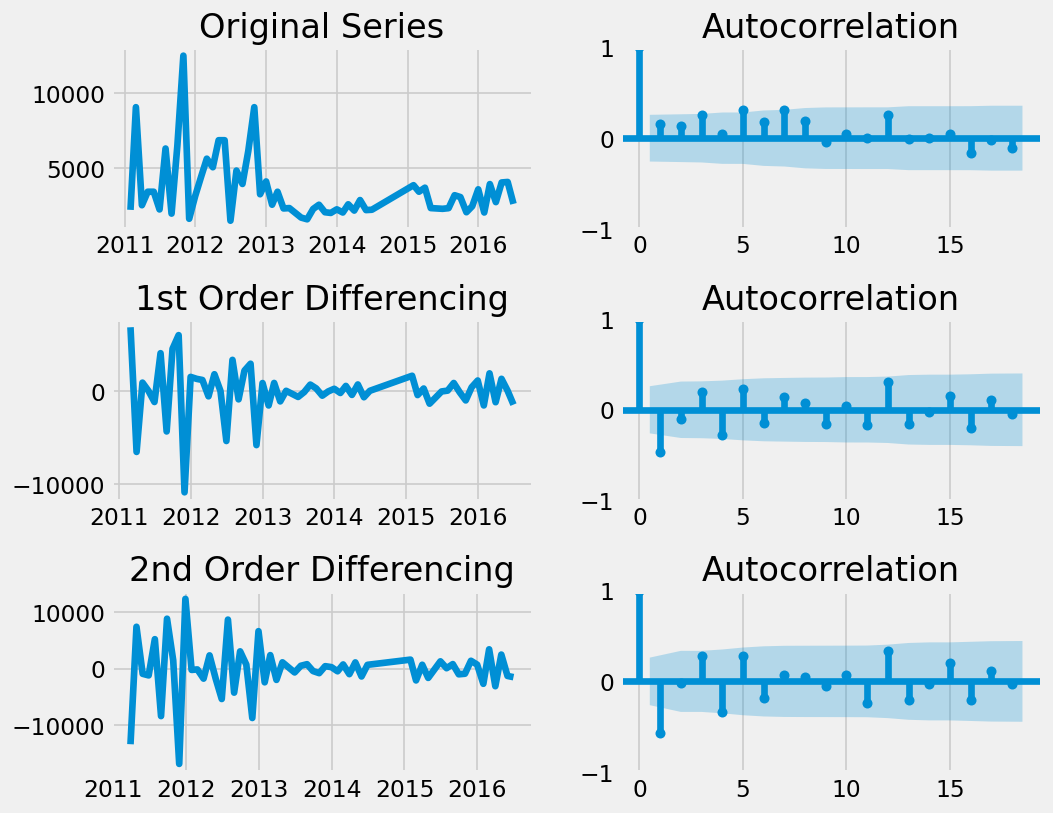

In [ ]:
#plt.close()
dated_DMFGRFEB = dropped_MFGRFEB
dated_DMFGRFEB.index = pd.to_datetime(dated_DMFGRFEB.index)
#dropped_MFGRFEB.plot()

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2)#, sharex=True)
axes[0, 0].plot(dropped_MFGRFEB); axes[0, 0].set_title('Original Series')
plot_acf(dropped_MFGRFEB, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(
    dropped_MFGRFEB.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(dropped_MFGRFEB.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[
    2, 0].plot(
    dropped_MFGRFEB.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(dropped_MFGRFEB.diff().diff().dropna(), ax=axes[2, 1])

fig.tight_layout() 
plt.show()


For the above data, we can see that the time series reaches stationarity with one order of differencing.

Diviser les données en un seul point, ce n'est pas très utile pour les séries chronologiques.

TimeSeriesSplit fournit des indices d'entraînement et de test pour fractionner les échantillons de données de séries temporelles observés à des intervalles de temps fixes.

Dans chaque division, les indices de test doivent être plus élevés qu'auparavant et, comme indiqué précédemment, vous ne pouvez pas utiliser le brassage dans un validateur croisé. Ceci est l'exemple d'avion de sklearn

Nous ne voulons pas utiliser d'informations dans le futur pour former nos modèles donc, nous opterons donc pour TimeSeriesSplit, toujours sur l'ensemble de données de jouet défini auparavant.

Dans l'analyse de séries chronologiques, cependant, nous ne sommes pas en mesure d'utiliser cette commande simple, car les observations de nos ensembles de données de séries chronologiques ne sont pas indépendantes.
Les caractéristiques des données de séries chronologiques, telles que la nature autorégressive, la tendance, la saisonnalité ou la cyclicité, ne permettraient pas à une répartition aléatoire d'être valide.
Un modèle qui sait que les premiers prédisent naturellement bien les seconds. Dans ce cas, le résultat du test sera trop optimiste quant au pouvoir prédictif du modèle.

Nous séparons les données de test des données de formation comme une certaine partie de la fin de l'ensemble de données.

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(dropped_MFGRFEB):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = dropped_MFGRFEB[train_index], dropped_MFGRFEB[test_index]
#    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12] TEST: [13 14 15 16 17 18 19 20 21]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21] TEST: [22 23 24 25 26 27 28 29 30]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30] TEST: [31 32 33 34 35 36 37 38 39]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] TEST: [40 41 42 43 44 45 46 47 48]
TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48] TEST: [49 50 51 52 53 54 55 56 57]


In [ ]:
# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

La fonction score_model() ci-dessous implémente cela et renvoie un tuple de (clé et résultat), où la clé est une version chaîne de la configuration du modèle testé.

#### Ordre du terme AR (p)

L'étape suivante consiste à identifier si le modèle a besoin de termes AR.
Nous découvrirons le nombre requis de termes AR en inspectant le graphique d'autocorrélation partielle (PACF).

    L'autocorrélation partielle peut être imaginée comme la corrélation entre la série et son retard, après exclusion des contributions des retards intermédiaires.
    Ainsi, PACF transmet en quelque sorte la corrélation pure entre un décalage et la série.
    De cette façon, nous saurons si ce décalage est nécessaire dans le terme AR ou non.

    L'autocorrélation partielle du décalage (k) d'une série est le coefficient de ce décalage dans l'équation d'autorégression de Y.

    Maintenant, nous devrions trouver le nombre de termes AR.
    Toute autocorrélation dans une série stationnaire peut être rectifiée en ajoutant suffisamment de termes AR. Ainsi, nous considérons initialement que l'ordre du terme AR est égal au nombre de retards qui franchit la limite de signification dans le tracé PACF.

### Détection de la stationnarité

1. La moyenne de la série ne doit pas être fonction du temps. Le graphique rouge ci-dessous n’est pas stationnaire car la moyenne augmente avec le temps.
Modèle ARIMA avec Python - Prévisions de séries temporelles 2

2. La variance de la série ne doit pas être une fonction du temps. Notez dans le graphique rouge ci-dessous la variance des données qui varient dans le temps.
Modèle ARIMA avec Python - Prévisions de séries temporelles 3

3. Enfin, la covariance du i-ème terme et du (i + m)-ième terme ne doit pas être fonction du temps. Dans le graphique suivant, vous remarquerez que l’écart se rapproche à mesure que le temps augmente. Par conséquent, la covariance n’est pas en rapport avec le temps pour la « série rouge ».
Modèle ARIMA avec Python - Prévisions de séries temporelles 4

Si une série temporelle est stationnaire et présente un comportement particulier pendant un intervalle de temps donné, on peut supposer sans risque de se tromper qu’elle présentera le même comportement à un moment ultérieur. La plupart des méthodes de modélisation statistique supposent ou exigent que la série temporelle soit stationnaire.

#### Regard sur les tracés de la fonction d'autocorrélation (ACF)

L'autocorrélation est la corrélation d'un signal avec une copie retardée - ou un décalage - de lui-même en fonction du retard.
Lors du traçage de la valeur de l'ACF pour des décalages croissants (un tracé appelé corrélogramme), les valeurs ont tendance à se dégrader rapidement vers zéro pour les séries chronologiques stationnaires (voir figure 1, à droite), tandis que pour les données non stationnaires, la dégradation se produira plus lentement.

#### Trouver l'ordre du terme MA (q)

Tout comme nous avons examiné le graphique PACF pour le nombre de termes AR, nous examinerons le graphique ACF pour le nombre de termes MA. Un terme MA est techniquement l'erreur de la prévision décalée.

    L'ACF indique combien de termes MA sont nécessaires pour supprimer toute autocorrélation dans la série stationnaire.

    Voyons le graphique d'autocorrélation de la série différenciée.

/home/fitec/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/fitec/.local/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:593: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/home/fitec/.local/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.76190D+00    |proj g|=  3.77843D-01

At iterate    5    f=  6.62412D+00    |proj g|=  1.05945D-01

At iterate   10    f=  6.61286D+00    |proj g|=  3.94131D-04

At iterate   15    f=  6.61286D+00    |proj g|=  4.10640D-04

At iterate   20    f=  6.61283D+00    |proj g|=  5.55502D-03

At iterate   25    f=  6.60983D+00    |proj g|=  4.38412D-02

At iterate   30    f=  6.59662D+00    |proj g|=  1.18186D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

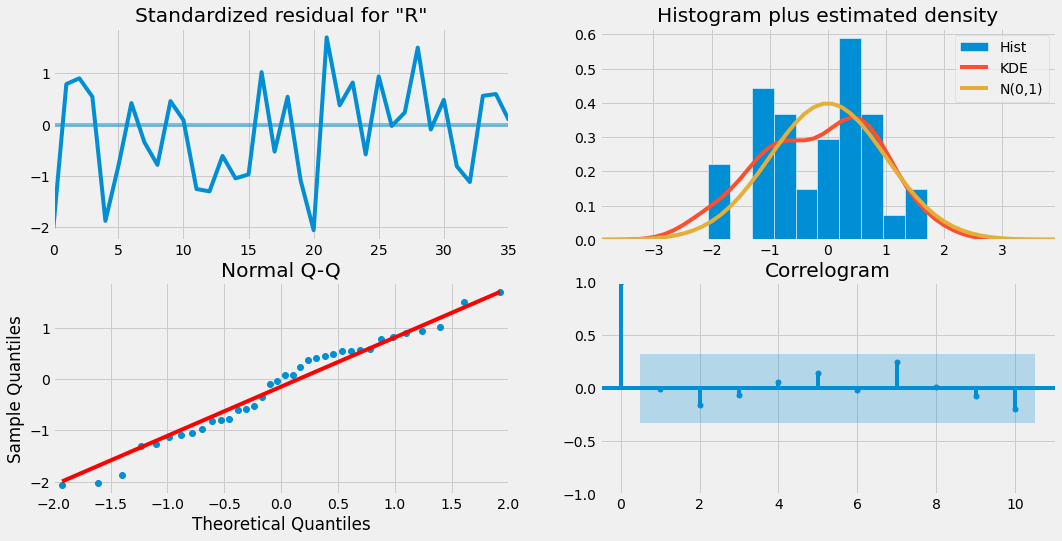

In [ ]:
mod = sm.tsa.statespace.SARIMAX(X_train,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=True,
                                enforce_invertibility=False)
fitted_m = mod.fit()

fitted_m.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
fitted_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                            Revenue   No. Observations:                   49
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -323.222
Date:                            Mon, 07 Feb 2022   AIC                            656.445
Time:                                    10:23:36   BIC                            664.362
Sample:                                         0   HQIC                           659.208
                                             - 49                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1088      0.350      0.311      0.756      -0.577       0.795
ma.L1         -0.6949      0.255     -2.727      0.006      -1.194      -0.195
ar.S.L12       0.3278      0.192      1.710      0.087      -0.048       0.703
ma.S.L12      -1.0000      0.308     -3.248      0.001      -1.603      -0.397
sigma2      3.027e+06   1.02e-07   2.98e+13      0.000    3.03e+06    3.03e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.18
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               0.50   Skew:                            -0.22
Prob(H) (two-sided):                  0.25   Kurtosis:                         2.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+29. Standard errors may be unstable.
"""

L'AIC mesure l'adéquation d'un modèle aux données tout en tenant compte de la complexité globale du modèle.
Un modèle qui s'adapte très bien aux données tout en utilisant de nombreuses fonctionnalités se verra attribuer un score AIC plus élevé qu'un modèle qui utilise moins de fonctionnalités pour obtenir la même qualité d'ajustement.
Par conséquent, nous souhaitons trouver le modèle qui donne la valeur AIC la plus faible.

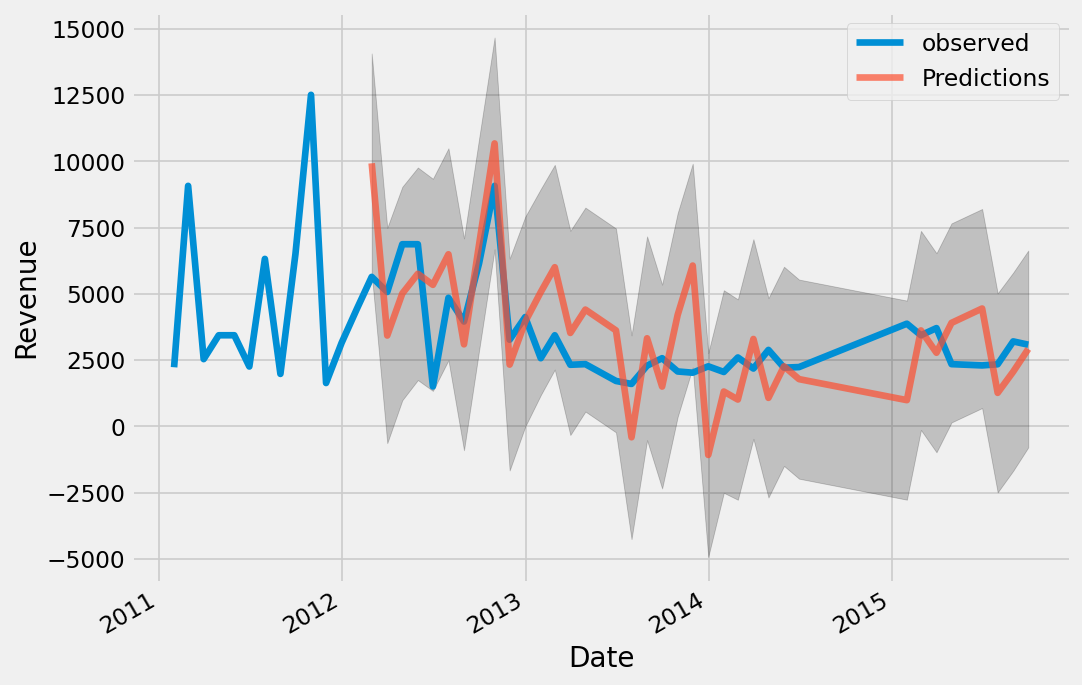

In [ ]:
start_forecast = 13
pred = fitted_m.get_prediction(start=start_forecast, dynamic=False)
pred_ci = pred.conf_int()

ax = X_train.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='Predictions', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Revenue')
plt.legend()

plt.show()

In [ ]:
y_forecasted = pred_uc.predicted_mean
y_truth = dropped_MFGRFEB[49:]

# Compute the mean square error
mse = ((y_forecasted[49:] - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
#print(y_forecasted[49:])
print(y_truth)

The Mean Squared Error of our forecasts is nan
Date
2015-10-31    2068.333333
2015-11-30    2467.800000
2015-12-31    3596.500000
2016-01-31    2049.666667
2016-02-29    3945.818182
2016-03-31    2742.666667
2016-04-30    4052.500000
2016-05-31    4086.500000
2016-06-30    2625.500000
Name: Revenue, dtype: float64


In [ ]:
fitted_m.forecast(10)[58]

2518.505332147169

In [ ]:
dropped_MFGRFEB

Date
2011-01-31     2227.000000
2011-02-28     9073.000000
2011-03-31     2534.000000
2011-04-30     3435.000000
2011-05-31     3435.000000
2011-06-30     2255.000000
2011-07-31     6316.333333
2011-08-31     1976.500000
2011-09-30     6506.500000
2011-10-31    12508.000000
2011-11-30     1633.000000
2011-12-31     3149.000000
2012-01-31     4454.000000
2012-02-29     5638.000000
2012-03-31     5068.000000
2012-04-30     6870.000000
2012-05-31     6870.000000
2012-06-30     1503.000000
2012-07-31     4847.333333
2012-08-31     3953.500000
2012-09-30     6143.000000
2012-10-31     9073.000000
2012-11-30     3266.000000
2012-12-31     4121.000000
2013-01-31     2569.000000
2013-02-28     3435.000000
2013-03-31     2321.400000
2013-04-30     2345.000000
2013-06-30     1710.250000
2013-07-31     1597.666667
2013-08-31     2287.800000
2013-09-30     2569.000000
2013-10-31     2068.333333
2013-11-30     2022.400000
2013-12-31     2262.583333
2014-01-31     2049.666667
2014-02-28     2596.909

In [ ]:
#fitted_m
#pred
pred_ci

,lower Revenue,upper Revenue
49,100.691562,7508.377336
50,-870.614111,7155.571046
51,-1108.523594,7331.707895
52,-1365.149762,7453.979103
53,-1494.427889,7686.180296
54,-906.677711,8621.582043
55,-1516.398505,8347.563978
56,-1580.624229,8608.697883
57,-711.225698,9794.880198
58,-2890.156546,7927.167210


In [ ]:
#pred_uc# = fitted_m.get_prediction(start=12, end=36, dynamic=False)
#pred_ci = pred_uc.conf_int()
pred_uc.predicted_mean

49     3804.534449
50     3142.478468
51     3111.592150
52     3044.414671
53     3095.876204
54     3857.452166
55     3415.582736
56     3514.036827
57     4541.827250
58     2518.505332
59     3183.841031
60     3302.079806
61     4547.446044
62     3453.837944
63     3633.941561
64     3537.590635
65     3069.400578
66     4223.656913
67     3548.467304
68     4124.940429
69     5505.410984
70     2804.700360
71     3405.304764
72     3602.993697
73     5018.683984
74     3783.631517
75     4032.888630
76     3926.975894
77     3288.466222
78     4571.426426
79     3819.764419
80     4552.911783
81     6048.975833
82     3126.246101
83     3705.634349
84     3929.363653
85     5400.878895
86     4119.467000
87     4391.389678
88     4282.342989
89     3588.009816
90     4913.153655
91     4136.427260
92     4920.925753
93     6454.876418
94     3459.378297
95     4031.812794
96     4264.077020
97     5753.889300
98     4457.282764
99     4736.634246
100    4626.560381
101    3913.

## Conclusion

Après avoir vérifié que les données de la série chronologique dépendent de manière significative de la saisonnalité, nous confirmons notre choix d'ajuster un modèle statistique traitant la saisonnalité comme modèle de référence.

Nous avons décidé de prioriser l'algorithme Seasonal Autoregressive Integrated Moving Average, SARIMA ou ARIMA saisonnière, est une extension d'ARIMA qui prend explicitement en charge les données de séries chronologiques univariées avec une composante saisonnière.
Nous utiliserons l'implémentation de SARIMA fournie par la bibliothèque statsmodels.

Il ajoute trois nouveaux hyperparamètres à ARIMA, pour spécifier l'autorégression (AR), la différenciation (I) et la moyenne mobile (MA) pour la composante saisonnière de la série, ainsi qu'un paramètre supplémentaire pour la période de la saisonnalité :

    P : ordre autorégressif saisonnier.
    D : Ordre des différences saisonnières.
    Q : Ordre moyen mobile saisonnier.
    m : Le nombre de pas de temps pour une seule période saisonnière.
    
La tendance et les hyperparamètres saisonniers du modèle peuvent être configurés en analysant les tracés d'autocorrélation et d'autocorrélation partielle, ce qui peut nécessiter une certaine expertise.

Une approche alternative consiste à rechercher sur une grille une suite de configurations de modèles et à découvrir quelles configurations fonctionnent le mieux pour une série temporelle univariée spécifique.

Elle possède des hyperparamètres qui contrôlent la nature du modèle réalisé pour la série, la tendance et la saisonnalité, notamment :

    ordre : Un tuple p, d, et q paramètres pour la modélisation de la tendance.
    sesonal_order : un tuple de paramètres P, D, Q et m pour la modélisation de la saisonnalité
    tendance : Un paramètre pour contrôler un modèle de tendance déterministe comme l'un des « n », « c », « t », « ct » pour aucune tendance, constante, linéaire et constante avec tendance linéaire, respectivement.

A FAIRE

In [ ]:
conda install -c conda-forge prophet